In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is a bit flawed because I'm not taking instrument response difference between 2019 and 2022 into account which is around 10% reduced response for 2022.
data_2019 = np.loadtxt('../data/2019_preprocessed.txt')
exposuretime_2019 = 1.32366e5

data_synthetic = np.loadtxt('../data/J1808_synthetic_realisation.dat')
data_synthetic_v2 = np.loadtxt('../data/J1808_synthetic_v2_realisation.dat')
data_synthetic_kajava = np.loadtxt('../data/J1808_synthetic_kajava_realisation.dat')

data_2022 = np.loadtxt('../data/2022_preprocessed.txt')
exposuretime_2022 = 7.13422e4

phases = np.linspace(0, 1, 32)

Text(0.5, 0, 'phases (cycles)')

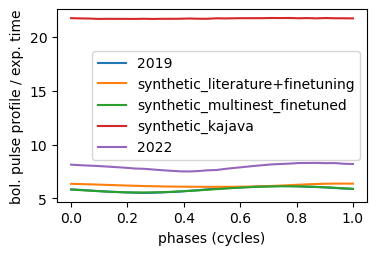

In [3]:
fig, ax = plt.subplots(figsize=(4,2.5))

ax.plot(phases, np.sum(data_2019,axis=0)/exposuretime_2019, label='2019')
ax.plot(phases, np.sum(data_synthetic,axis=0)/exposuretime_2019, label='synthetic_literature+finetuning')
ax.plot(phases, np.sum(data_synthetic_v2,axis=0)/exposuretime_2019, label='synthetic_multinest_finetuned')
ax.plot(phases, np.sum(data_synthetic_kajava,axis=0)/exposuretime_2019, label='synthetic_kajava')
ax.plot(phases, np.sum(data_2022,axis=0)/exposuretime_2022, label='2022')
ax.legend()
ax.set_ylabel('bol. pulse profile / exp. time')
ax.set_xlabel('phases (cycles)')


In [4]:
channels = np.asarray([0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
       1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
       1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74,
       1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85,
       1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96,
       1.97, 1.98, 1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07,
       2.08, 2.09, 2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18,
       2.19, 2.2 , 2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29,
       2.3 , 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 ,
       2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51,
       2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62,
       2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73,
       2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84,
       2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95,
       2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06,
       3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17,
       3.18, 3.19, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28,
       3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39,
       3.4 , 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61,
       3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.71, 3.72,
       3.73, 3.74, 3.75, 3.76, 3.77, 3.78, 3.79, 3.8 , 3.81, 3.82, 3.83,
       3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94,
       3.95, 3.96, 3.97, 3.98, 3.99, 4.  , 4.01, 4.02, 4.03, 4.04, 4.05,
       4.06, 4.07, 4.08, 4.09, 4.1 , 4.11, 4.12, 4.13, 4.14, 4.15, 4.16,
       4.17, 4.18, 4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27,
       4.28, 4.29, 4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38,
       4.39, 4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49,
       4.5 , 4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 ,
       4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71,
       4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82,
       4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93,
       4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.  , 5.01, 5.02, 5.03, 5.04,
       5.05, 5.06, 5.07, 5.08, 5.09, 5.1 , 5.11, 5.12, 5.13, 5.14, 5.15,
       5.16, 5.17, 5.18, 5.19, 5.2 , 5.21, 5.22, 5.23, 5.24, 5.25, 5.26,
       5.27, 5.28, 5.29, 5.3 , 5.31, 5.32, 5.33, 5.34, 5.35, 5.36, 5.37,
       5.38, 5.39, 5.4 , 5.41, 5.42, 5.43, 5.44, 5.45, 5.46, 5.47, 5.48,
       5.49, 5.5 , 5.51, 5.52, 5.53, 5.54, 5.55, 5.56, 5.57, 5.58, 5.59,
       5.6 , 5.61, 5.62, 5.63, 5.64, 5.65, 5.66, 5.67, 5.68, 5.69, 5.7 ,
       5.71, 5.72, 5.73, 5.74, 5.75, 5.76, 5.77, 5.78, 5.79, 5.8 , 5.81,
       5.82, 5.83, 5.84, 5.85, 5.86, 5.87, 5.88, 5.89, 5.9 , 5.91, 5.92,
       5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99]) #edges -1, is not the same as taking the mids

Text(0, 0.5, 'spectrum/exp. time')

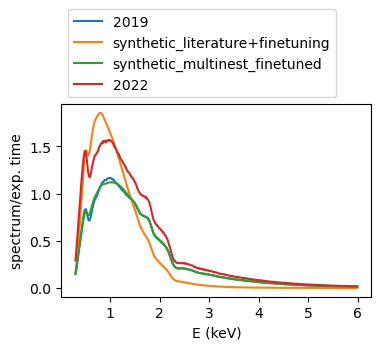

In [17]:
fig, ax = plt.subplots(figsize=(4,2.5))

ax.plot(channels, np.sum(data_2019,axis=1)/exposuretime_2019, label='2019')
ax.plot(channels, np.sum(data_synthetic,axis=1)/exposuretime_2019, label='synthetic_literature+finetuning')
ax.plot(channels, np.sum(data_synthetic_v2,axis=1)/exposuretime_2019, label='synthetic_multinest_finetuned')
# ax.plot(channels, np.sum(data_synthetic_kajava,axis=1)/exposuretime_2019, label='synthetic_kajava')
ax.plot(channels, np.sum(data_2022,axis=1)/exposuretime_2022, label='2022')
ax.legend(loc='lower left', bbox_to_anchor=(0.0, 1.0))
ax.set_xlabel('E (keV)')
ax.set_ylabel('spectrum/exp. time')

